<a href="https://colab.research.google.com/github/premchandra25/Face-mask-detection/blob/main/bostonhousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb



In [3]:
#importing libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



# **1. IMPORTING DRIVE**

In [4]:
#importing  the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#importing the dataset from the drive
dataset=pd.read_csv('/content/drive/MyDrive/HousingData.csv')

In [6]:
# checking the no of coloumns present in the dataset
dataset.head(5)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
# finding the dataset last 5 rows data 
dataset.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


# **2. Checking the dataset info**

In [8]:
# use info to check the basic information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
#checking the no of columns.
dataset.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
#describes the statistical analysis of the data 
# gives the min, max, mean, std, 25%, 50%, 75%
dataset.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
dataset.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
#checking for the duplicate values.
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

In [13]:
len(dataset[dataset.duplicated()])

0

In [14]:
dataset.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [16]:
dataset.nunique()

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [17]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [18]:
data=dataset

In [19]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [20]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
# Finding out the correlation between the features
corr = dataset.corr()
corr.shape

(14, 14)

# **3.Heatmap that describing the features.**

<Axes: >

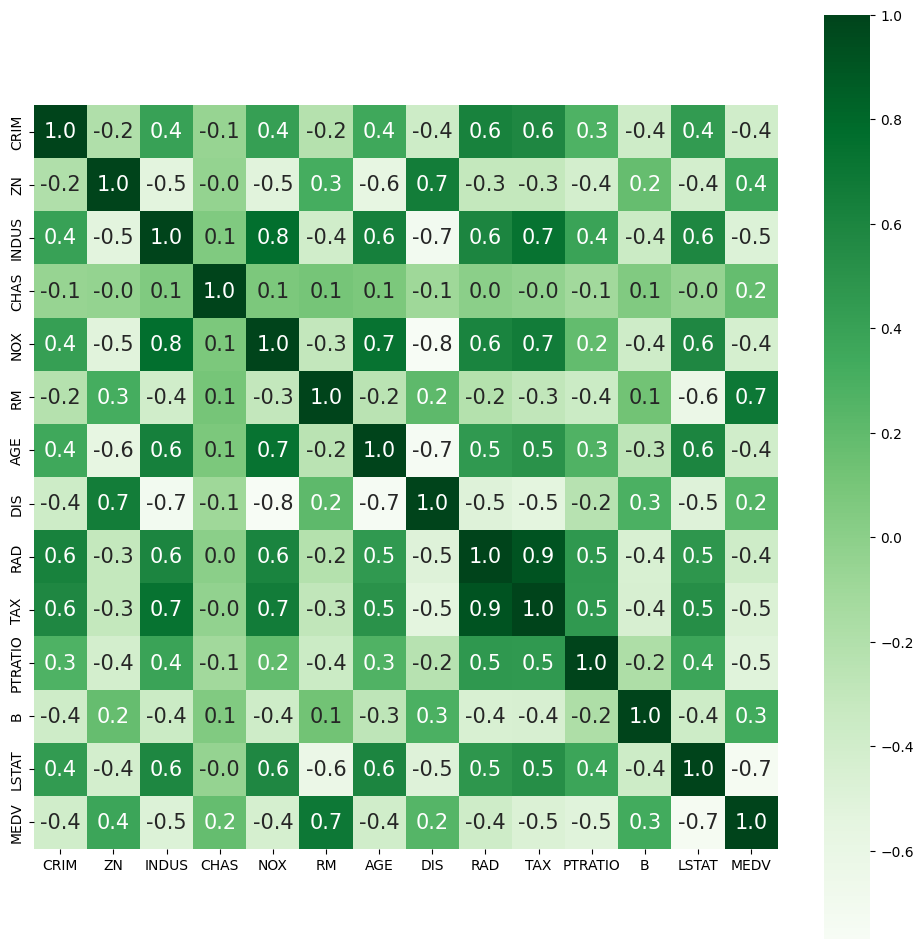

In [22]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [23]:
import statsmodels.formula.api as smf

In [24]:
# estimate model 1
formula1 = 'PRICE ~ CRIM  +	ZN  +	INDUS +	CHAS  +	NOX +	RM  +	AGE  +	DIS +	RAD  +	TAX  +	PTRATIO  +B  +LSTAT'

In [27]:
from keras.datasets import boston_housing

In [28]:
boston=boston_housing


# 4.Plots that describes in graphical way between the CRIM & **TAX** 

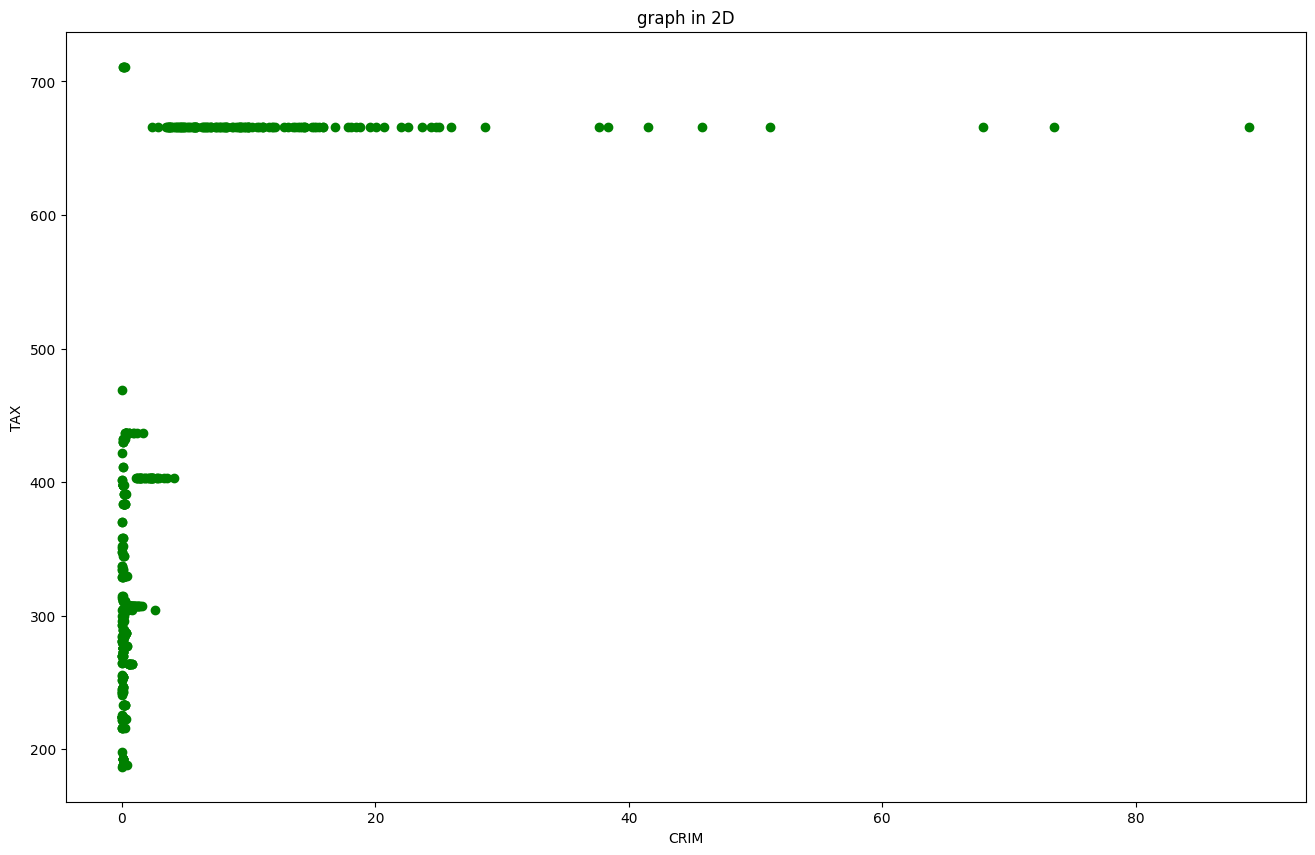

In [30]:

plt.figure(figsize=(16,10))
plt.scatter(dataset["CRIM"]	, dataset["TAX"],c='g')
plt.xlabel('CRIM')
plt.ylabel('TAX')
plt.title('graph in 2D')
plt.show()



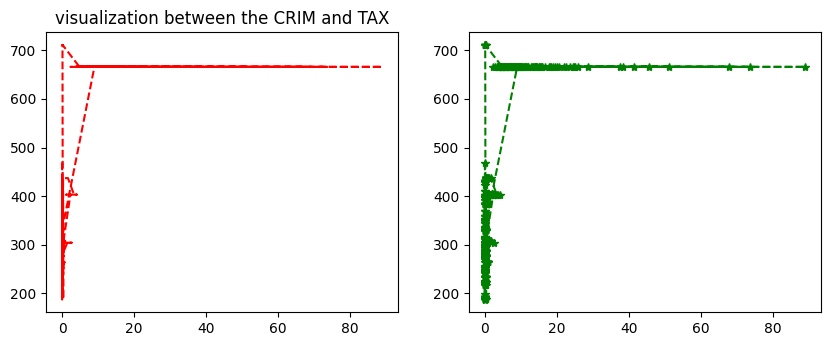

In [31]:
x=dataset['CRIM']
y=dataset['TAX']

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.plot(x,y,'r--')
plt.title('visualization between the CRIM and TAX')
plt.subplot(2,2,2)
plt.plot(x,y,'g*--')

#plt.subplot(2,2,3)
#plt.plot(x,y,'bo')
#plt.subplot(2,2,4)
#plt.plot(x,y,'go')

In [32]:
numeric_features = dataset.describe().columns
numeric_features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

LinAlgError: ignored

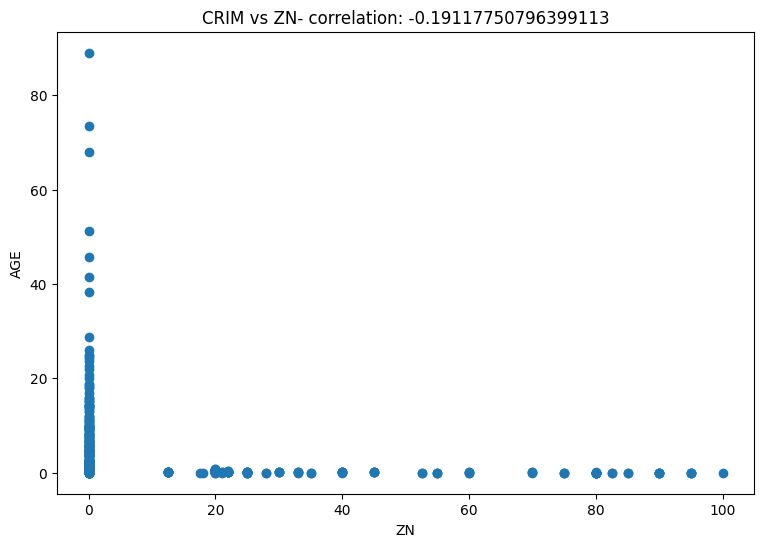

In [33]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['CRIM']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('AGE')
    ax.set_title('CRIM vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['CRIM'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

# **5. Categorical features between CRIM & TAX**

In [34]:
categorical_features=["CRIM",	"TAX"]

In [35]:
for col in categorical_features[:]:
    counts = dataset[col].value_counts()
    print(counts)

14.33370    2
0.01501     2
0.00632     1
0.05023     1
0.02543     1
           ..
1.34284     1
1.22358     1
2.44668     1
3.53501     1
0.04741     1
Name: CRIM, Length: 484, dtype: int64
666    132
307     40
403     30
437     15
304     14
      ... 
285      1
198      1
256      1
244      1
313      1
Name: TAX, Length: 66, dtype: int64


# 6. Box plots of the CRIM and **TAX** 

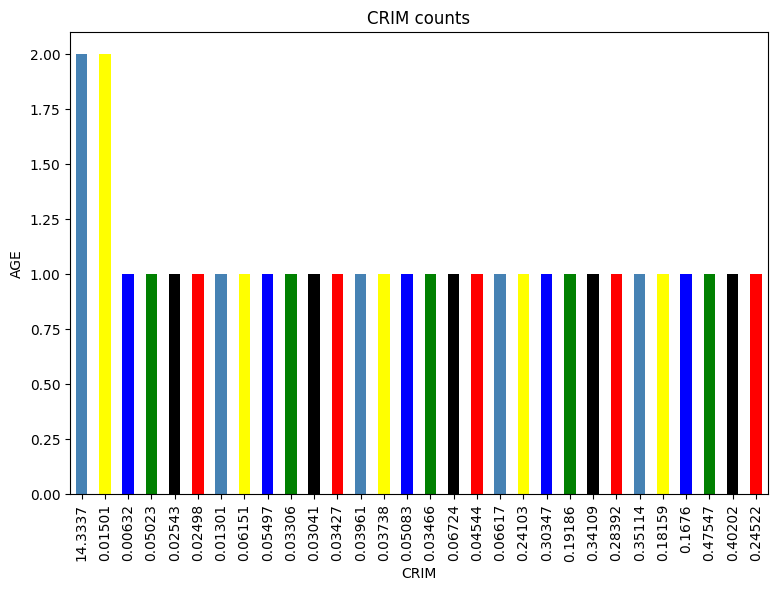

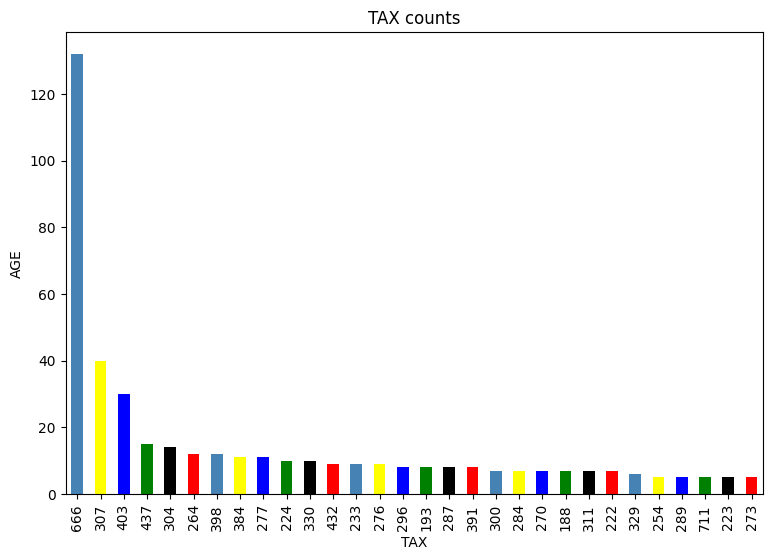

In [36]:

for col in categorical_features[:]:
    counts = dataset[col].value_counts().head(30)#.sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color={'red',"blue","green","yellow",'steelblue',"black"})
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("AGE")
plt.show()

In [37]:
numeric_features = dataset['CRIM'].head(30),dataset['TAX'].head(30),dataset['CRIM'].head(30)
numeric_features

(0     0.00632
 1     0.02731
 2     0.02729
 3     0.03237
 4     0.06905
 5     0.02985
 6     0.08829
 7     0.14455
 8     0.21124
 9     0.17004
 10    0.22489
 11    0.11747
 12    0.09378
 13    0.62976
 14    0.63796
 15    0.62739
 16    1.05393
 17    0.78420
 18    0.80271
 19    0.72580
 20    1.25179
 21    0.85204
 22    1.23247
 23    0.98843
 24    0.75026
 25    0.84054
 26    0.67191
 27    0.95577
 28    0.77299
 29    1.00245
 Name: CRIM, dtype: float64,
 0     296
 1     242
 2     242
 3     222
 4     222
 5     222
 6     311
 7     311
 8     311
 9     311
 10    311
 11    311
 12    311
 13    307
 14    307
 15    307
 16    307
 17    307
 18    307
 19    307
 20    307
 21    307
 22    307
 23    307
 24    307
 25    307
 26    307
 27    307
 28    307
 29    307
 Name: TAX, dtype: int64,
 0     0.00632
 1     0.02731
 2     0.02729
 3     0.03237
 4     0.06905
 5     0.02985
 6     0.08829
 7     0.14455
 8     0.21124
 9     0.17004
 10    0.22489


In [38]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


# 7. **Correlation** **bold text**

<Axes: >

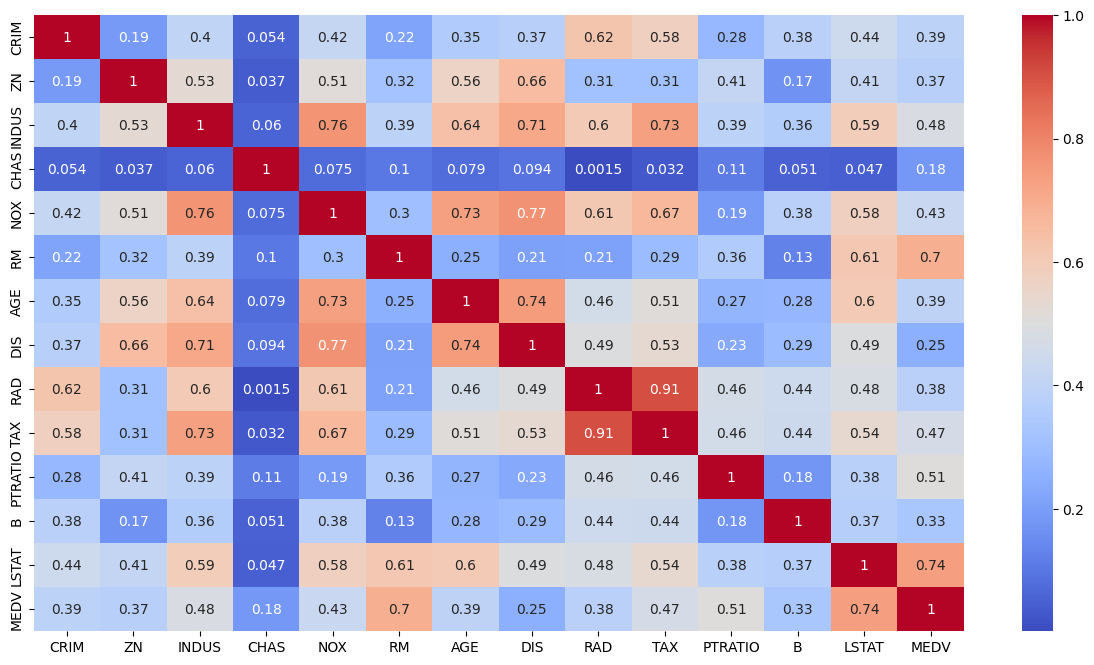

In [39]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sb.heatmap(abs(correlation), annot=True, cmap='coolwarm')

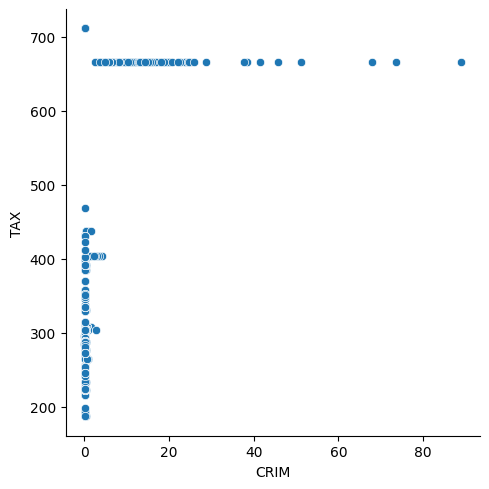

In [40]:
sb.relplot(data=dataset, x="CRIM", y="TAX")

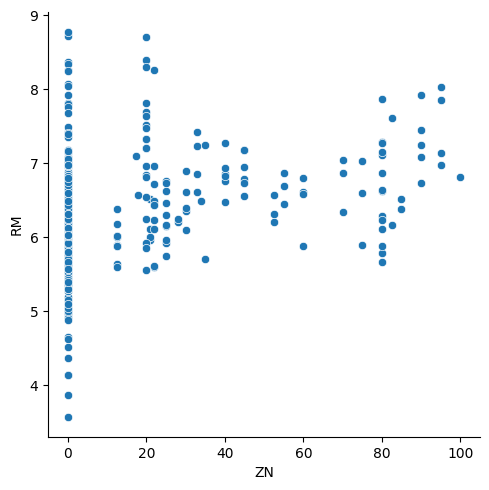

In [41]:
sb.relplot(data=dataset, x="ZN", y="RM")

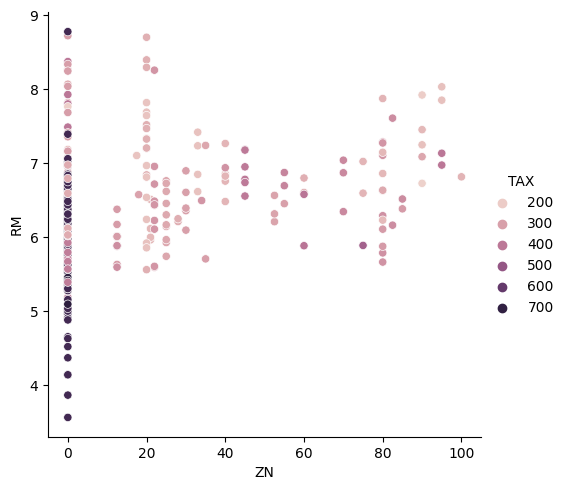

In [42]:
sb.relplot(data=dataset,x="ZN", y="RM", hue="TAX")

<Axes: xlabel='ZN', ylabel='TAX'>

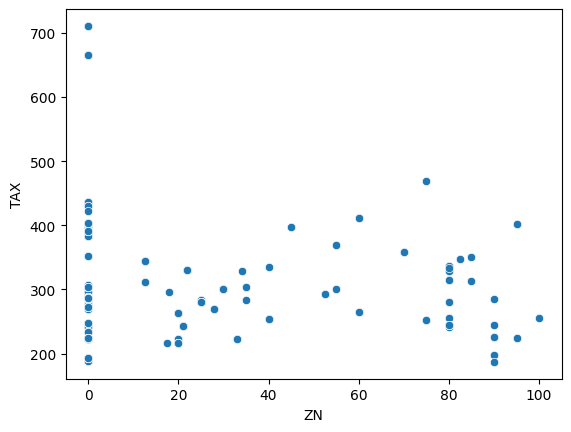

In [43]:
n=10000
x=dataset['CRIM']


sb.scatterplot(data=dataset, x="ZN", y="TAX")

In [45]:
labels=dataset.ZN.head(10)
values=dataset.TAX.head(10)

# **8.Pie chart of boston house**

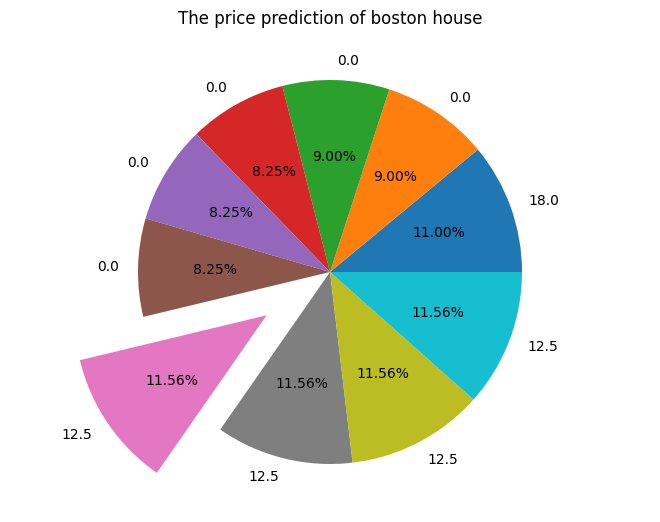

In [46]:
fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
explode = (0, 0, 0, 0,0,0,0.4,0,0,0)
ax.axis('equal')
ax.pie(values,labels=labels, explode=explode,autopct="%1.2f%%")
plt.title('The price prediction of boston house')
plt.show()


Text(0.5, 1.0, ' BOSTON HOUSE PRICE PREDICTION ')

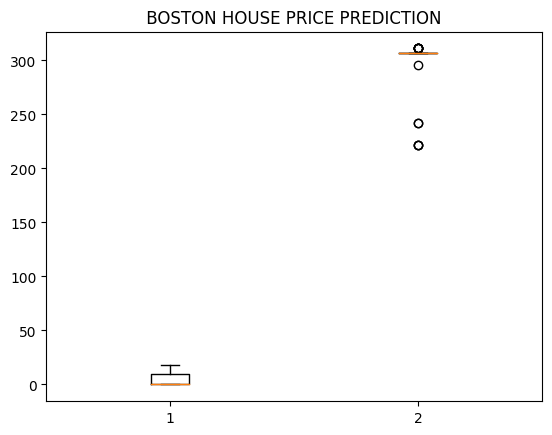

In [47]:
plt.boxplot((dataset.ZN.head(30),dataset.TAX.head(30)),vert=True,patch_artist=False); 
plt.title(' BOSTON HOUSE PRICE PREDICTION ')

<ipython-input-48-6499efe930e1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset['CRIM'])


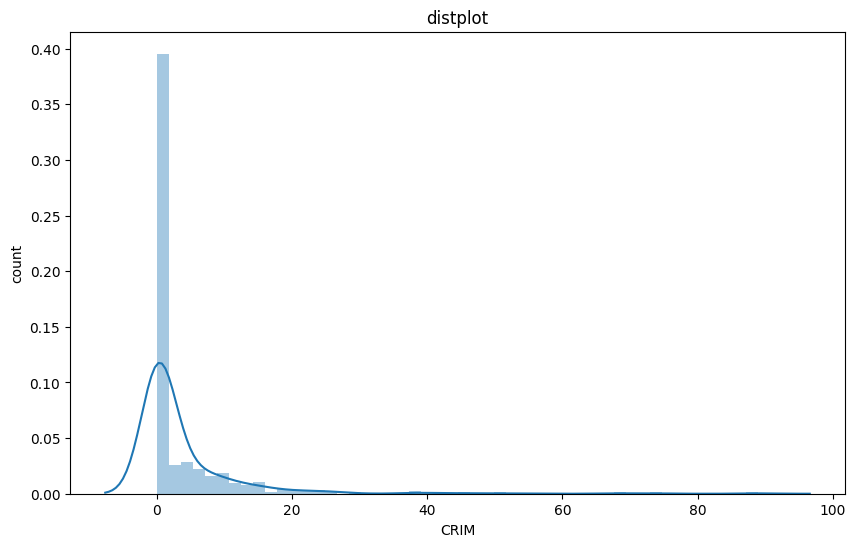

In [48]:
plt.figure(figsize=(10,6))
sb.distplot(dataset['CRIM']) 
plt.title("distplot")
plt.ylabel('count') 
plt.xlabel('CRIM')  
plt.show()

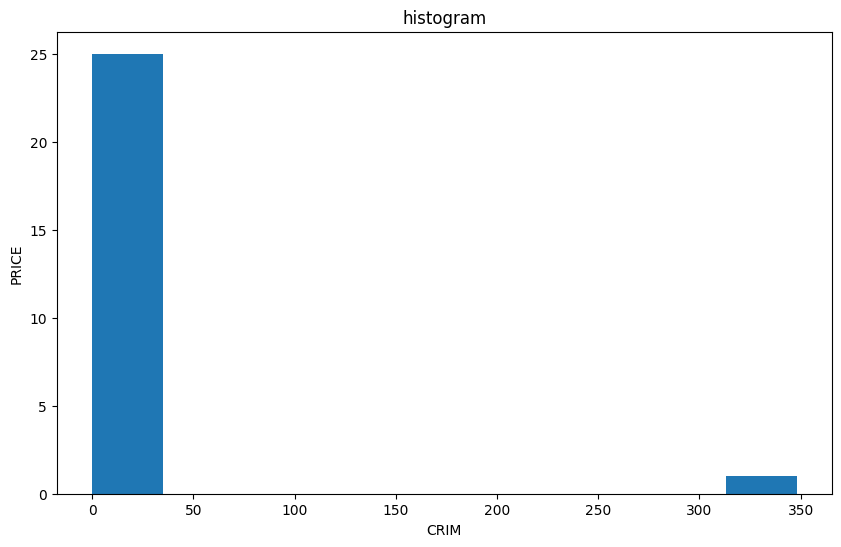

In [51]:
s=dataset[["CRIM","ZN"]].groupby('ZN').count()
a=np.array(s.head(30))
plt.figure(figsize=(10,6))
plt.hist(a) 
plt.title("histogram")
plt.ylabel('PRICE') 
plt.xlabel('CRIM')  
plt.show()

In [52]:
dataset[["TAX","RM"]].groupby('TAX').count()

,RM
TAX,
187,1
188,7
193,8
198,1
216,5
...,...
432,9
437,15
469,1


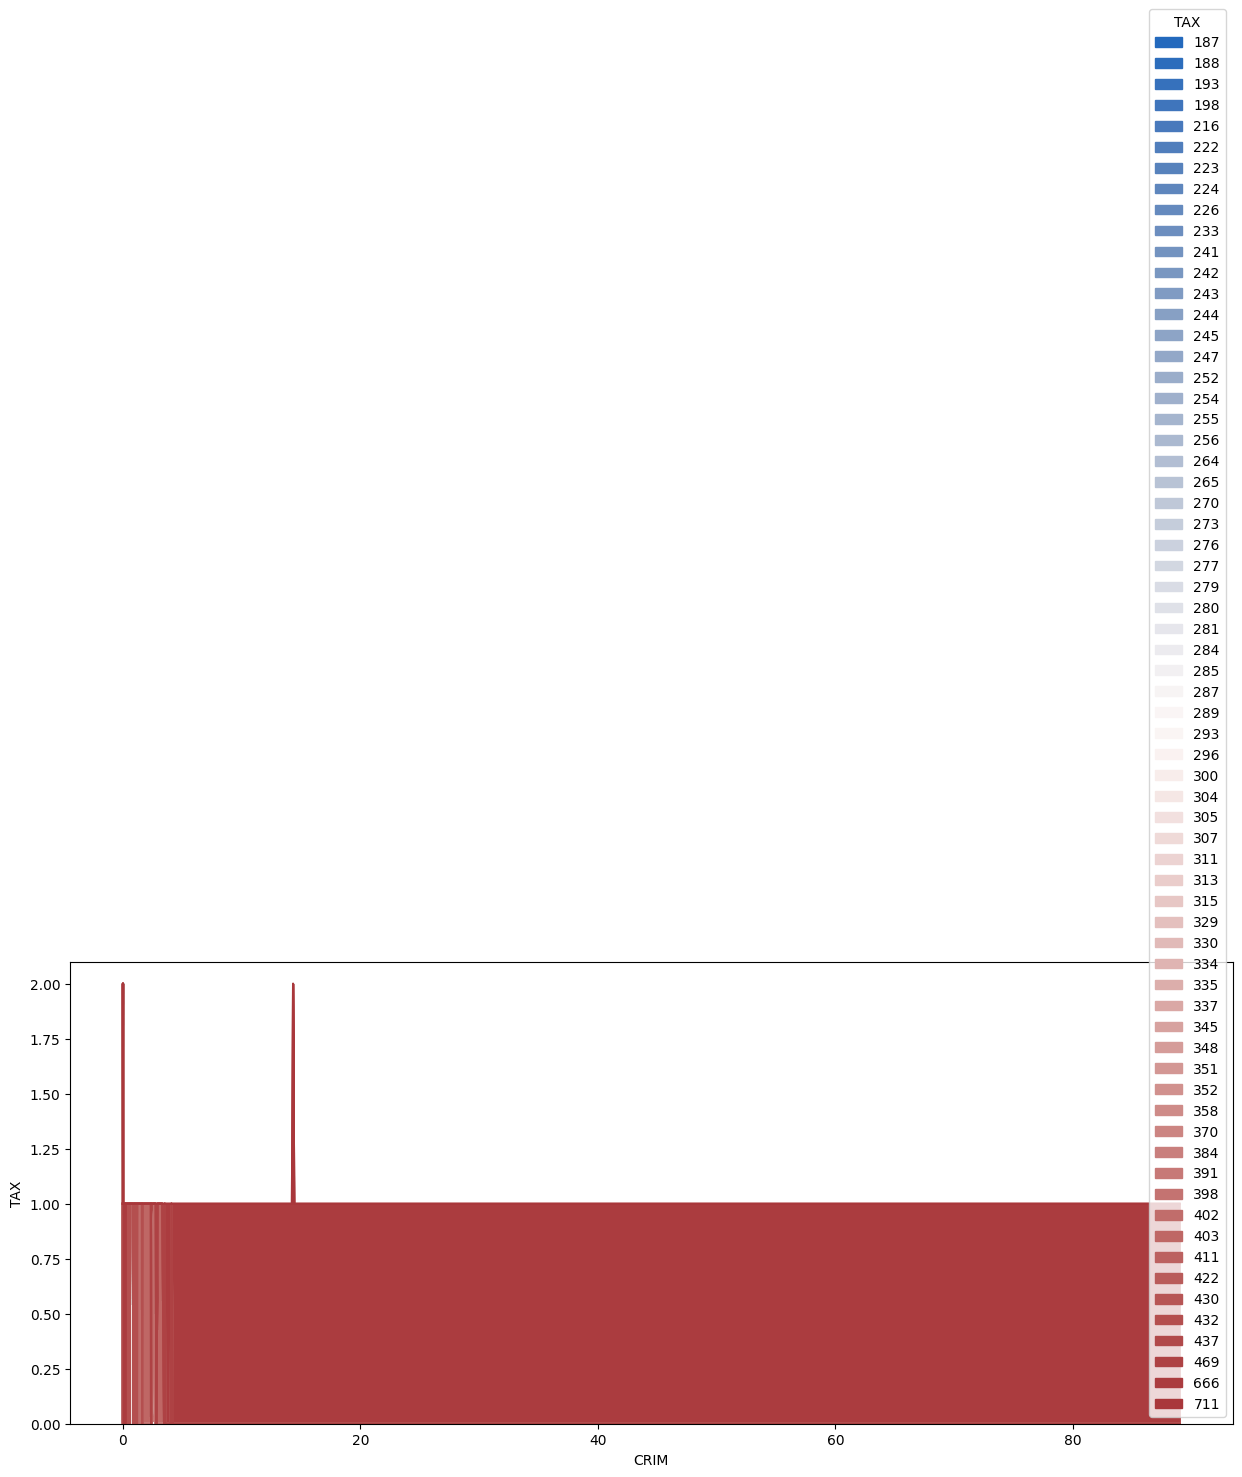

In [53]:
pd.crosstab(dataset.CRIM,dataset.TAX).plot(kind='area',figsize=(15,6),colormap='vlag')
plt.ylabel('TAX')
plt.show()

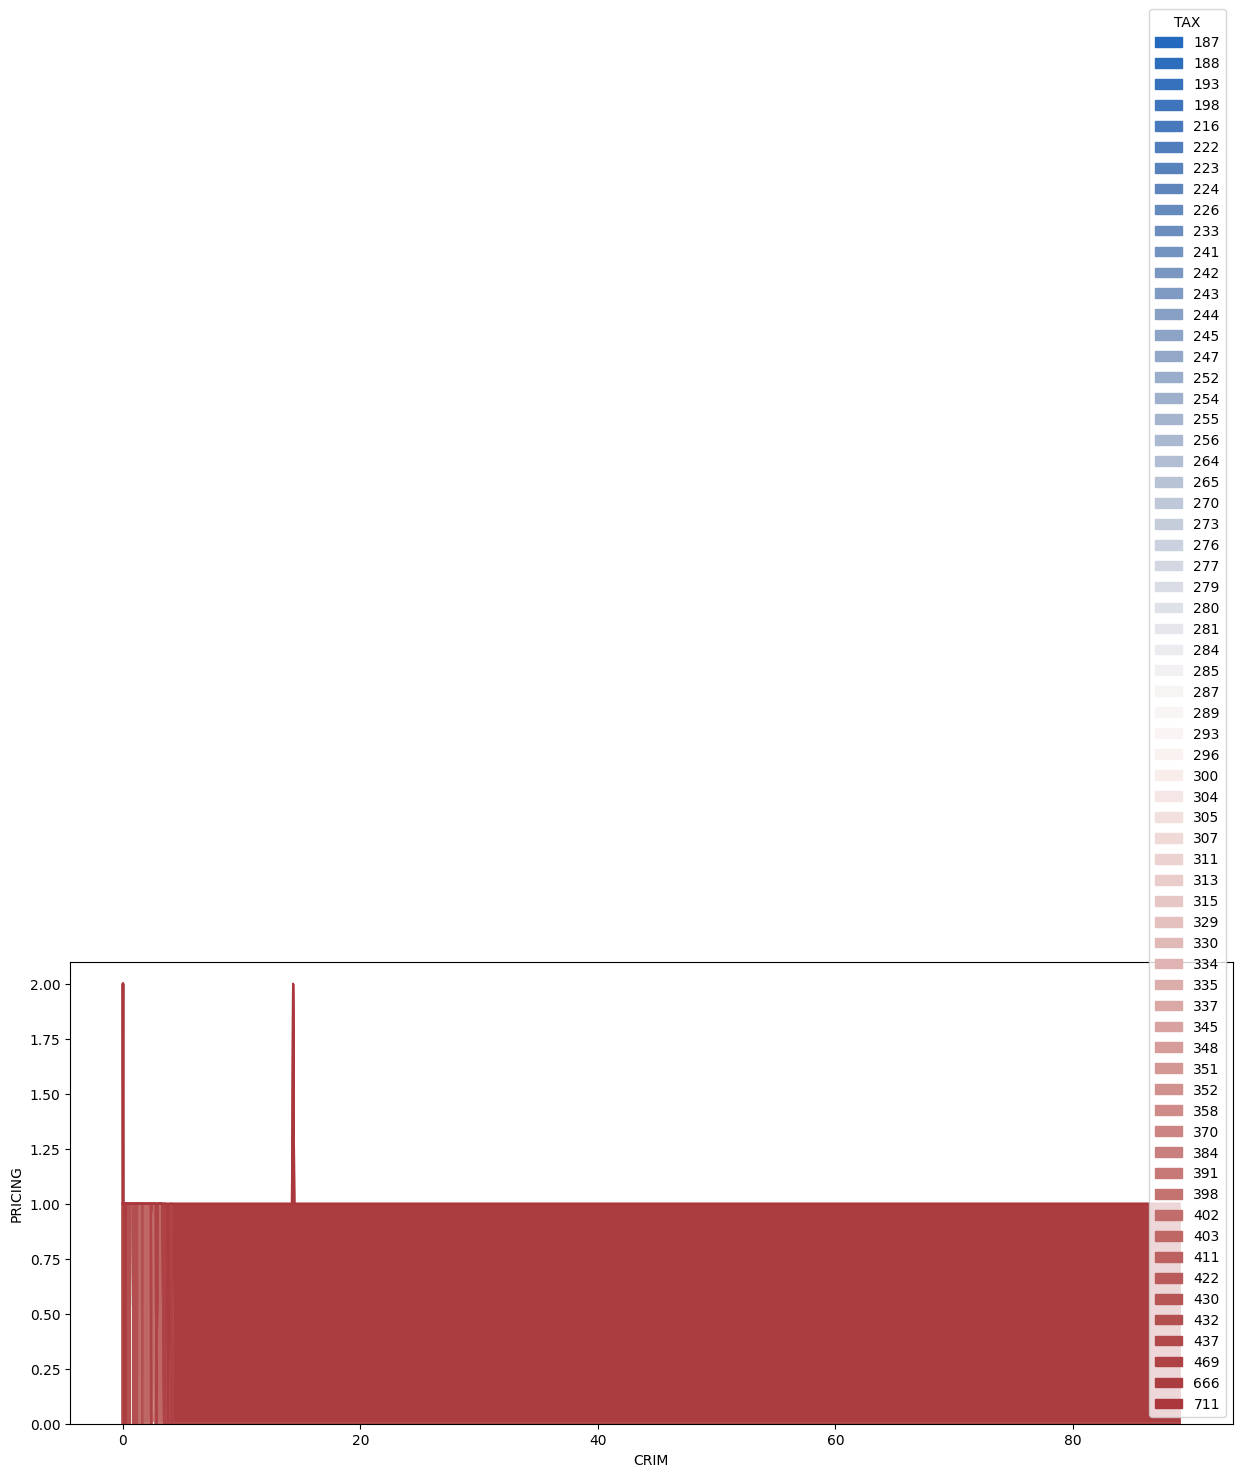

In [57]:
pd.crosstab(dataset.CRIM,dataset.TAX).plot(kind='area',figsize=(15,6),colormap='vlag')
plt.ylabel('PRICING')
plt.show()

<Axes: ylabel='TAX'>

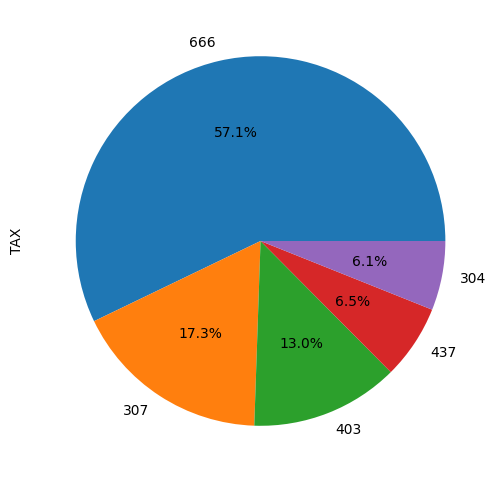

In [59]:
amount=dataset['TAX'].value_counts()[:5]
amount.plot(kind='pie',autopct='%1.1f%%',figsize=(7,6))



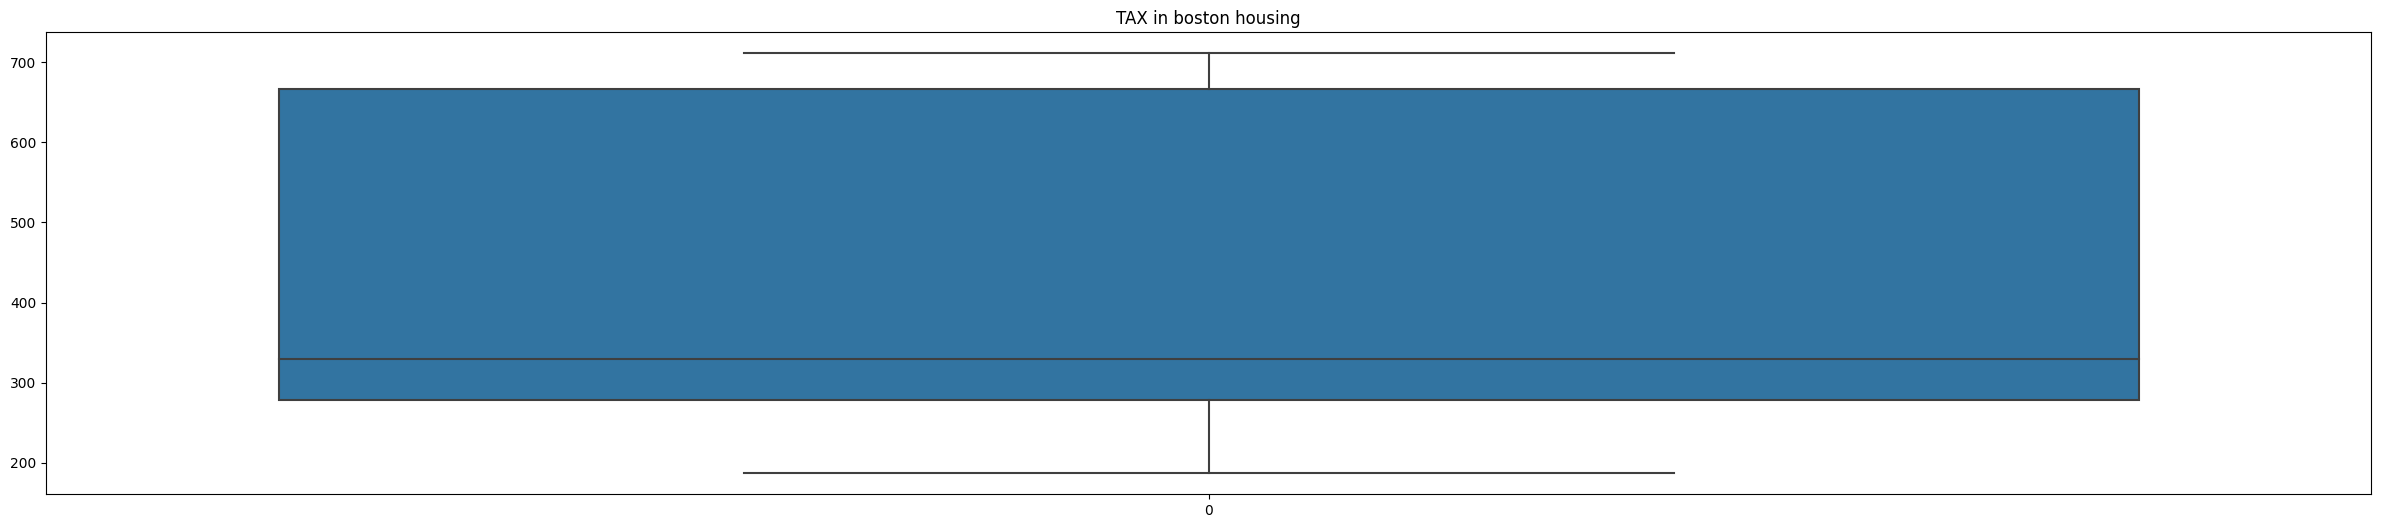

In [60]:
plt.figure(figsize=(30,6))
sb.boxplot(dataset['TAX'])
plt.title("TAX in boston housing")
plt.show()

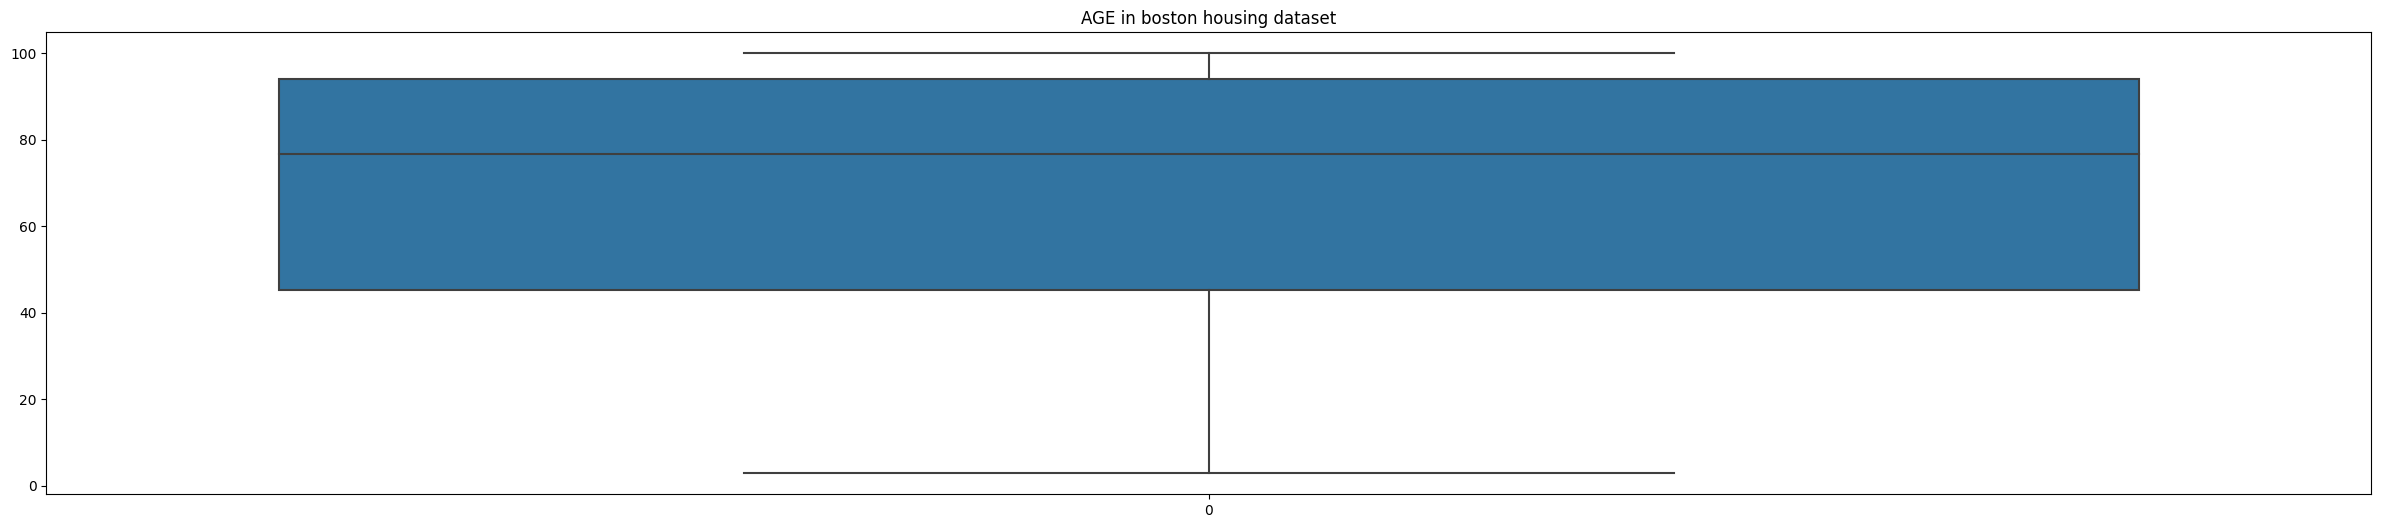

In [63]:
plt.figure(figsize=(30,6))
sb.boxplot(dataset['AGE'])
plt.title("AGE in boston housing dataset")
plt.show()

<ipython-input-64-6a9065459aa5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset.TAX, bins=24, norm_hist=True)


<Axes: xlabel='TAX', ylabel='Density'>

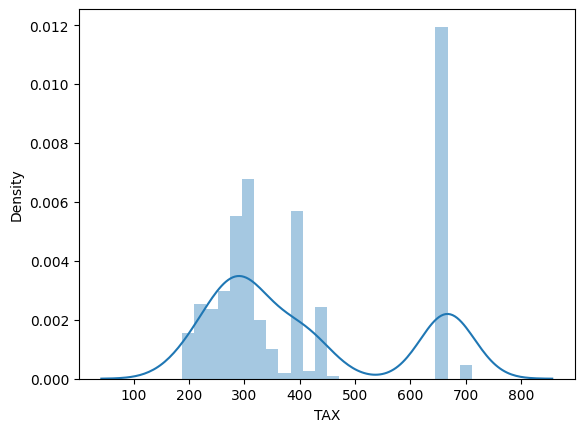

In [64]:
sb.distplot(dataset.TAX, bins=24, norm_hist=True)

In [65]:
sku=dataset.INDUS.value_counts()
sku

18.10    127
19.58     28
8.14      22
6.20      18
21.89     14
        ... 
1.32       1
1.38       1
3.75       1
0.46       1
2.31       1
Name: INDUS, Length: 76, dtype: int64

<Axes: >

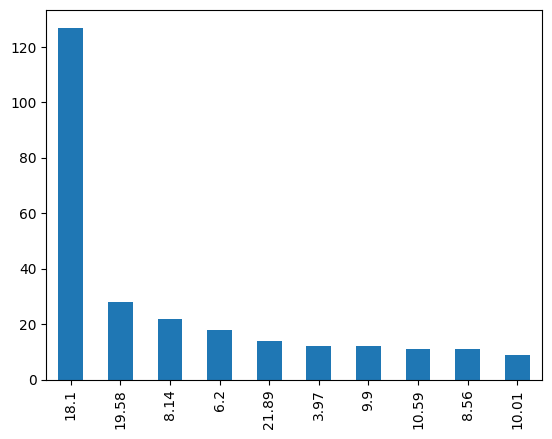

In [66]:
sku.head(10).plot(kind="bar")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

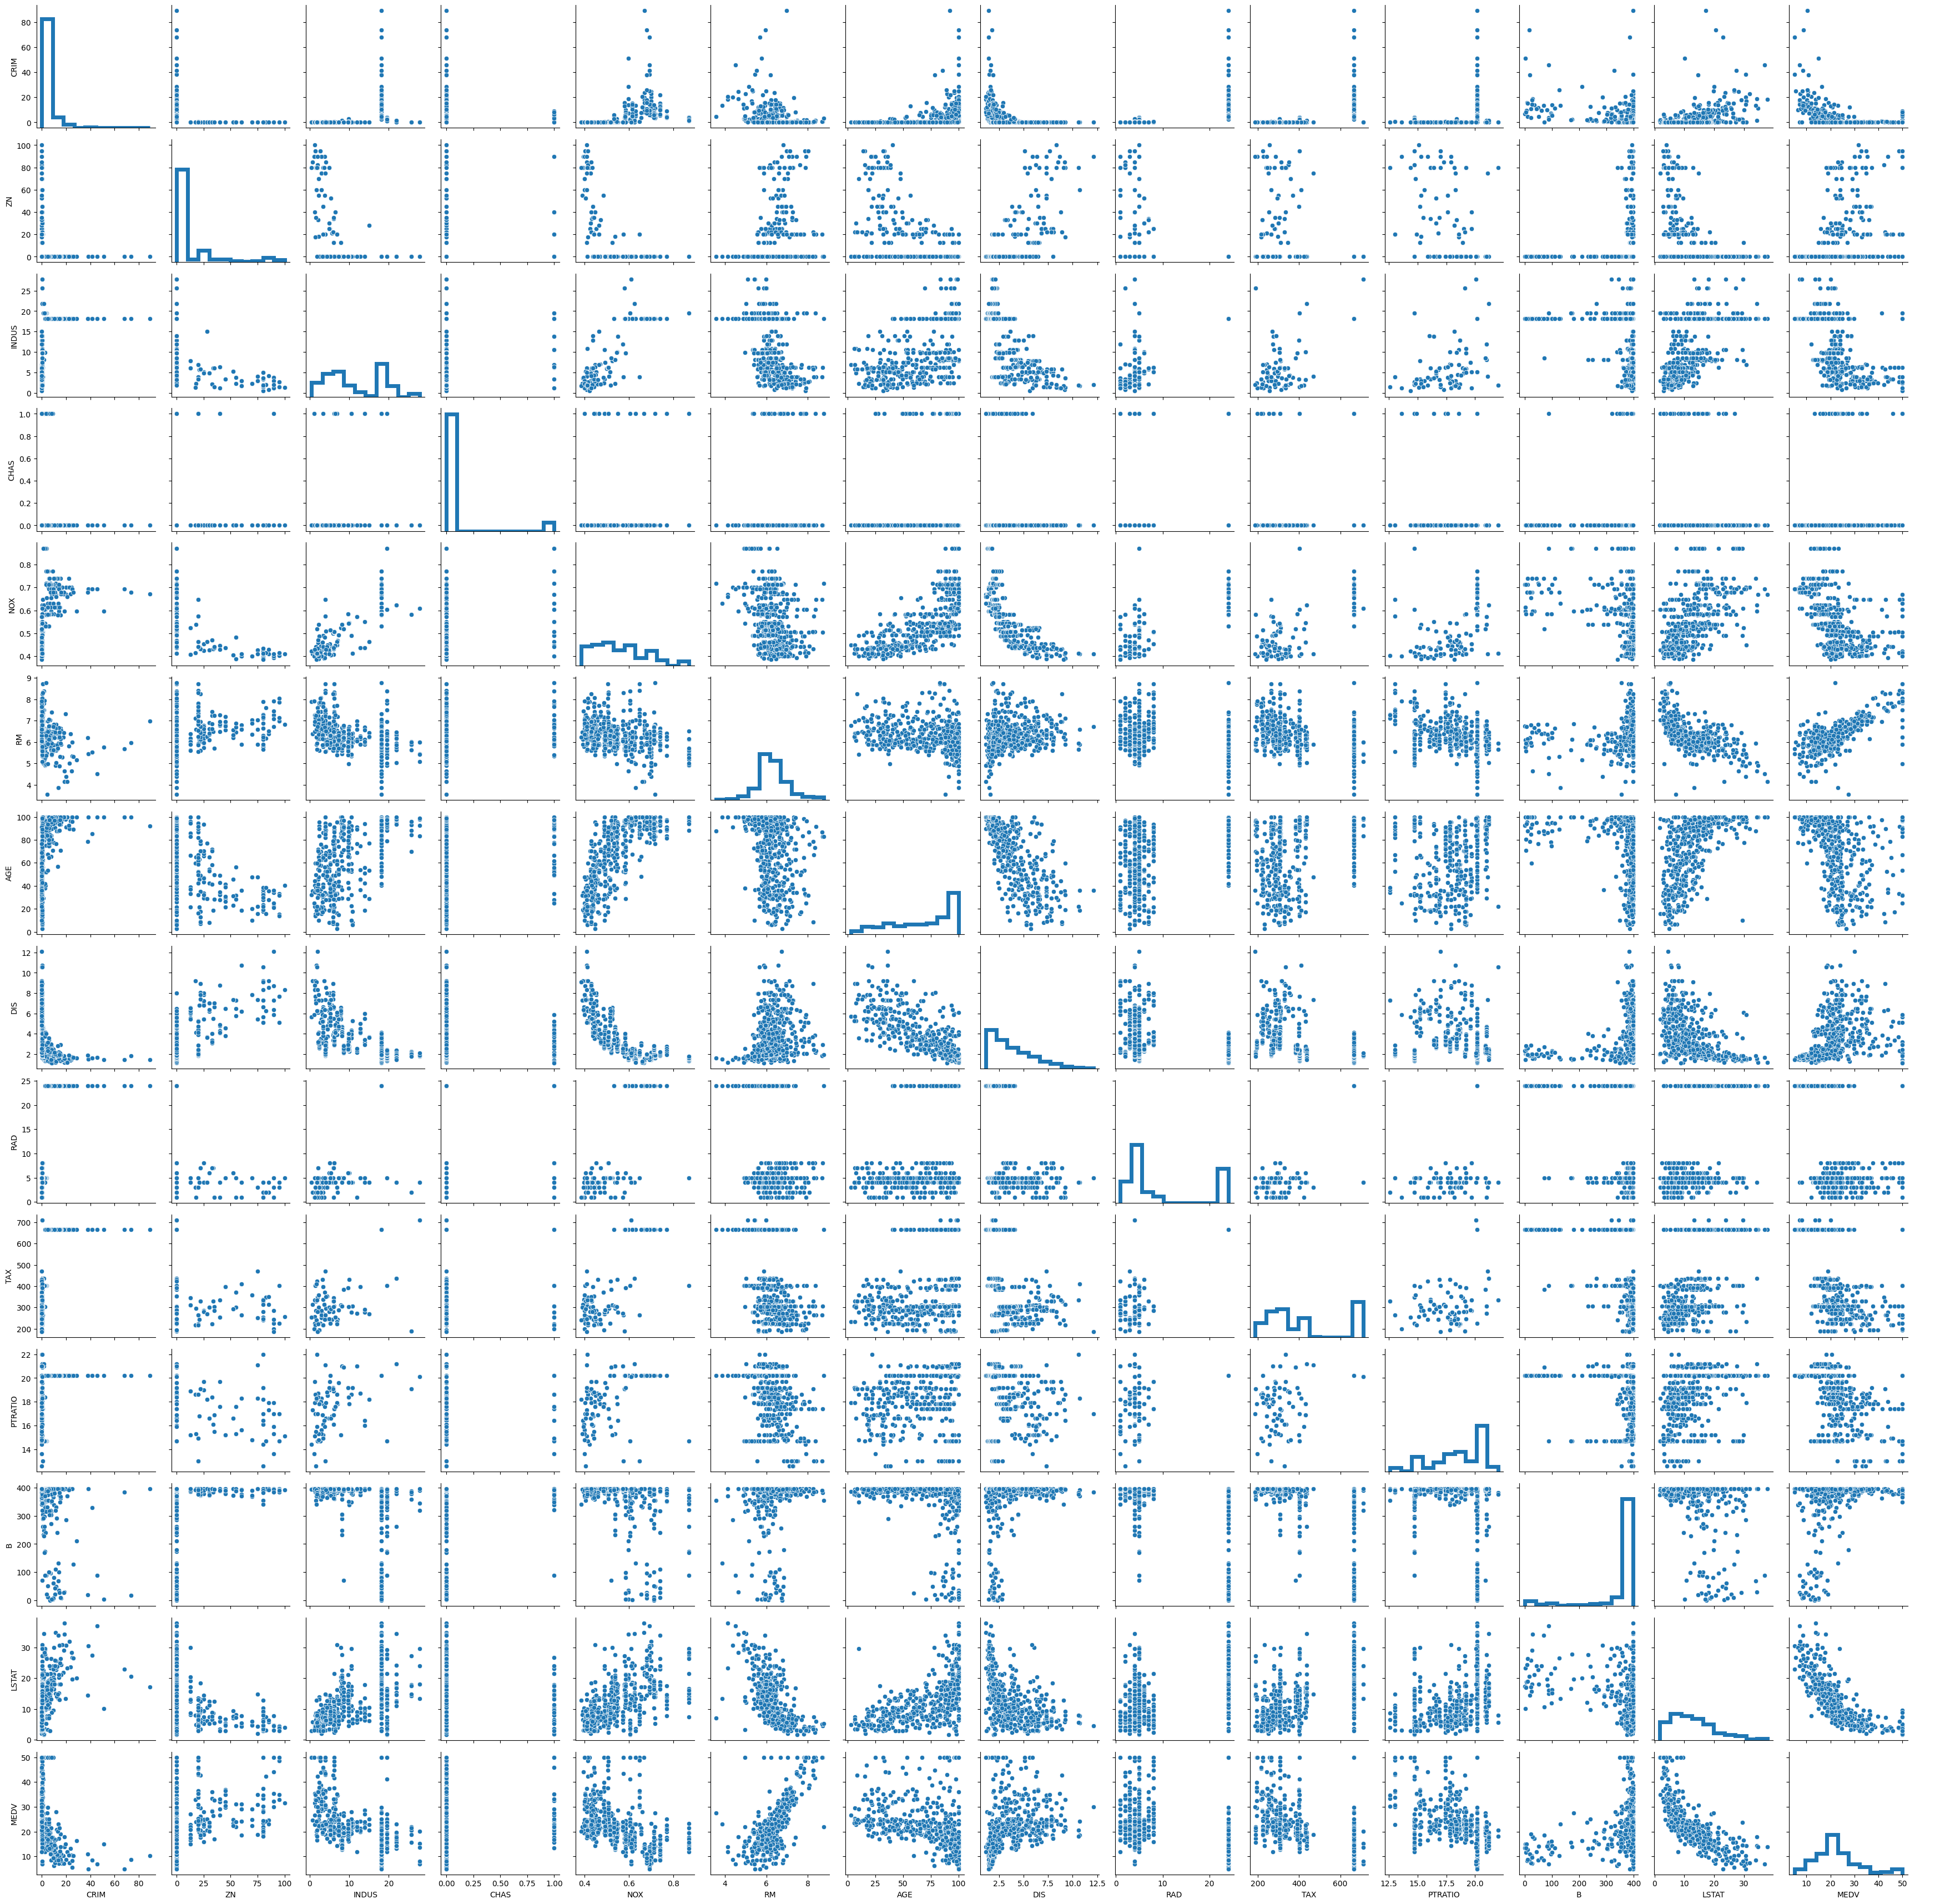

In [67]:
g=sb.PairGrid(data=dataset  ,palette="bright")
g.map_upper(sb.scatterplot)
g.map_lower(sb.scatterplot)
g.map_diag(plt.hist, histtype="step",linewidth=5)
g.add_legend()
plt.show()